In [154]:
from fuzzylogic.classes import Domain, Rule
from fuzzylogic.functions import R, S, triangular
from matplotlib import pyplot
pyplot.rc("figure", figsize=(8, 4))
import pandas as pd

In [155]:
# DEFINITION OF LINGUISTIC VARIABLES

,Universe of Discourse,Center
Linguistic Variable,,
Starving,0 - 20,10
Hungry,15 - 40,25
Satiated,35 - 70,55
Overfed,65 - 100,80


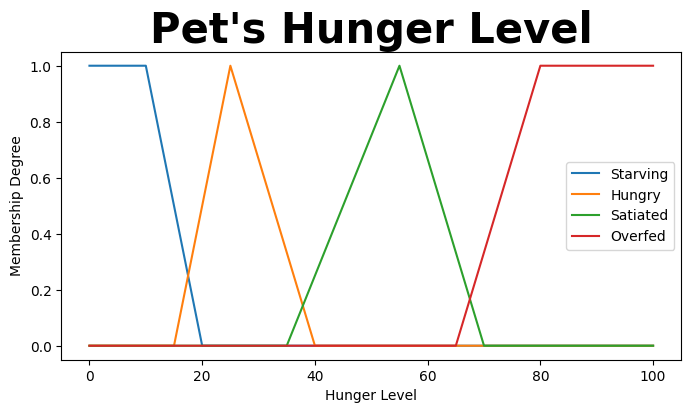

In [156]:
# Pet's Hunger Level
H = Domain("hunger_level", 0, 100, res=0.1)

H.starving = S(10, 20)
H.starving.plot()

H.hungry = triangular(15, 40, c=25, c_m=1, no_m=0)
H.hungry.plot()

H.satiated = triangular(35, 70, c=55, c_m=1, no_m=0)
H.satiated.plot()

H.overfed = R(65, 80)
H.overfed.plot()

pyplot.title("Pet's Hunger Level", fontweight="bold", fontsize=30)
pyplot.xlabel('Hunger Level')
pyplot.ylabel('Membership Degree')
pyplot.legend(['Starving', 'Hungry', 'Satiated', 'Overfed'])

# Hunger Level Table
H_data = {
    'Linguistic Variable': ['Starving', 'Hungry', 'Satiated', 'Overfed'],
    'Universe of Discourse': ['0 - 20', '15 - 40', '35 - 70', '65 - 100'],
    'Center': ['10', '25', '55', '80'],
}

df = pd.DataFrame(H_data)
df.set_index ('Linguistic Variable', inplace=True)
df

,Universe of Discourse,Center
Linguistic Variable,,
Low,0 - 4,2
Medium,3 - 7,5
High,6 - 10,8


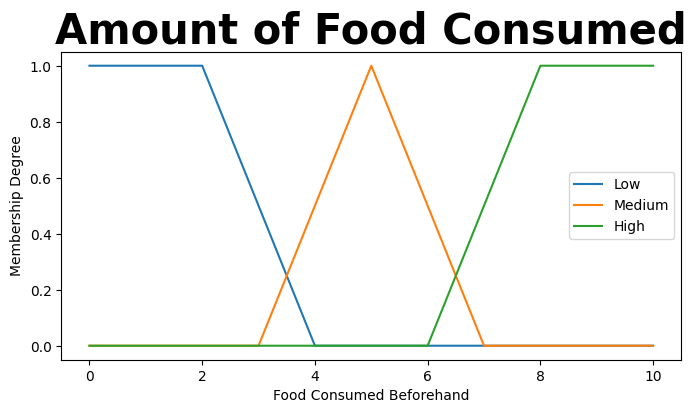

In [157]:
# Amount of Food Consumed
F = Domain("food_consumed", 0, 10, res=0.1)

F.low = S(2, 4)
F.low.plot()

F.medium = triangular(3, 7, c=5, c_m=1, no_m=0)
F.medium.plot()

F.high = R(6, 8)
F.high.plot()

pyplot.title("Amount of Food Consumed", fontweight="bold", fontsize=30)
pyplot.xlabel('Food Consumed Beforehand')
pyplot.ylabel('Membership Degree')
pyplot.legend(['Low', 'Medium', 'High'])

# Amount Consumed Beforehand Table 
F_data = {
    'Linguistic Variable': ['Low', 'Medium', 'High'],
    'Universe of Discourse': ['0 - 4', '3 - 7', '6 - 10'],
    'Center': ['2', '5', '8'],
}

df = pd.DataFrame(F_data)
df.set_index ('Linguistic Variable', inplace=True)
df

,Universe of Discourse,Center
Linguistic Variable,,
Slow,0 - 1,0
Moderate,0 - 2,1
Fast,1 - 2,2


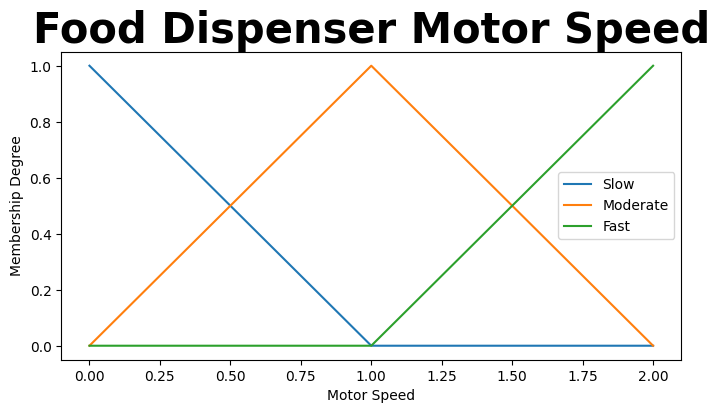

In [158]:
# Food Dispenser Motor Speed
MS = Domain("motor_speed", 0, 2, res=0.1)

MS.slow = S(0, 1)
MS.slow.plot()

MS.moderate = triangular(0, 2, c=1, c_m=1, no_m=0)
MS.moderate.plot()

MS.fast = R(1, 2)
MS.fast.plot()

pyplot.title("Food Dispenser Motor Speed", fontweight="bold", fontsize=30)
pyplot.xlabel('Motor Speed')
pyplot.ylabel('Membership Degree')
pyplot.legend(['Slow', 'Moderate', 'Fast'])

MS_data = {
    'Linguistic Variable': ['Slow', 'Moderate', 'Fast'],
    'Universe of Discourse': ['0 - 1', '0 - 2', '1 - 2'],
    'Center': ['0', '1', '2'],
}

df = pd.DataFrame(MS_data)
df.set_index ('Linguistic Variable', inplace=True)
df

In [159]:
data = {
    'Rule': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Pet\'s Hunger Level': ['Starving', 'Starving', 'Starving', 'Hungry', 'Hungry', 'Hungry', 'Satiated', 'Satiated', 'Satiated', 'Overfed', 'Overfed', 'Overfed'],
    'Amount of Food Consumed': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High'],
    'Food Dispenser Motor Speed': ['Fast', 'Fast', 'Fast', 'Moderate', 'Moderate', 'Slow', 'Moderate', 'Slow', 'Slow', 'Slow', 'Slow', 'Slow']
}

df = pd.DataFrame(data)
df.set_index('Rule', inplace=True)

df

,Pet's Hunger Level,Amount of Food Consumed,Food Dispenser Motor Speed
Rule,,,
1,Starving,Low,Fast
2,Starving,Medium,Fast
3,Starving,High,Fast
4,Hungry,Low,Moderate
5,Hungry,Medium,Moderate
6,Hungry,High,Slow
7,Satiated,Low,Moderate
8,Satiated,Medium,Slow
9,Satiated,High,Slow


In [160]:
# Rule Base
rules = []

rules.append(Rule({(H.starving, F.low): MS.fast})) # Rule 1
rules.append(Rule({(H.starving, F.medium): MS.fast})) # Rule 2
rules.append(Rule({(H.starving, F.high): MS.fast})) # Rule 3
rules.append(Rule({(H.hungry, F.low): MS.moderate})) # Rule 4
rules.append(Rule({(H.hungry, F.medium): MS.moderate})) # Rule 5
rules.append(Rule({(H.hungry, F.high): MS.slow})) # Rule 6
rules.append(Rule({(H.satiated, F.low): MS.moderate})) # Rule 7
rules.append(Rule({(H.satiated, F.medium): MS.slow})) # Rule 8
rules.append(Rule({(H.satiated, F.high): MS.slow})) # Rule 9
rules.append(Rule({(H.overfed, F.low): MS.slow})) # Rule 10
rules.append(Rule({(H.overfed, F.medium): MS.slow})) # Rule 11
rules.append(Rule({(H.overfed, F.high): MS.slow})) # Rule 12s

In [163]:
# Rule Evaluation
# edit values as desired
values = {  H: 19    , # Pet's Hunger Level (0 - 100) in percent (%)
            F: 6.5  }    # Amount of Food Consumed Beforehand (rate from 0 - 10)

In [164]:
output_terms = ["Fast", "Fast", "Fast", "Moderate", "Moderate", "Slow", "Moderate", "Slow", "Slow", "Slow", "Slow", "Slow"]

for i in range(len(rules)):
    print(f"Rule {i+ 1} : {rules[i](values)} -> {output_terms[i]}")

COG = sum(rules)(values)
print(f"\nCenter of Gravity: {COG}")

Rule 1 : None -> Fast
Rule 2 : 1.619047619047619 -> Fast
Rule 3 : 1.619047619047619 -> Fast
Rule 4 : None -> Moderate
Rule 5 : 0.9523809523809523 -> Moderate
Rule 6 : 0.2857142857142857 -> Slow
Rule 7 : None -> Moderate
Rule 8 : None -> Slow
Rule 9 : None -> Slow
Rule 10 : None -> Slow
Rule 11 : None -> Slow
Rule 12 : None -> Slow

Center of Gravity: 0.9047619047619049
